<a href="https://colab.research.google.com/github/Geon27/4-1-Boston_housin/blob/main/Boston_housing_%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 보스턴 주택 가격 예측(House Prices: Advanced Regression Techniques)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 파이썬 패키지 로드


In [2]:
# !pip uninstall scipy -y
# !pip uninstall pingouin -y
!pip install pingouin
# !pip install statsmodels==0.13.1
!pip install sidetable
!pip install sklearn-learn
# !pip install researchpy 
# !pip install bioinfokit
# !pip install sidetable


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn-learn (from versions: none)
ERROR: No matching distribution found for sklearn-learn


In [3]:
import seaborn as sns
import pandas as pd
#import datatable as dt
import scipy.stats as ss
from sklearn import datasets
import numpy
import sidetable 
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.options.display.float_format = lambda x: f'{x:.3f}'
#pd.reset_option('display.float_format')

## 데이터 로드

In [4]:
##데이터 로드: 엑셀파일
# 파일명: housing.csv
Df = pd.read_csv('/content/drive/MyDrive/보스턴_데이터과학/housing.csv')

데이터 변수명만 확인 + 각 변수들의 설명

In [5]:
#Df[1:1] #변수명만 추출
Df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
Df_dt = pd.DataFrame(Df) # 데이터 한눈에 보기

In [7]:
Df_dt

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670,22.400
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080,20.600
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640,23.900
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480,22.000


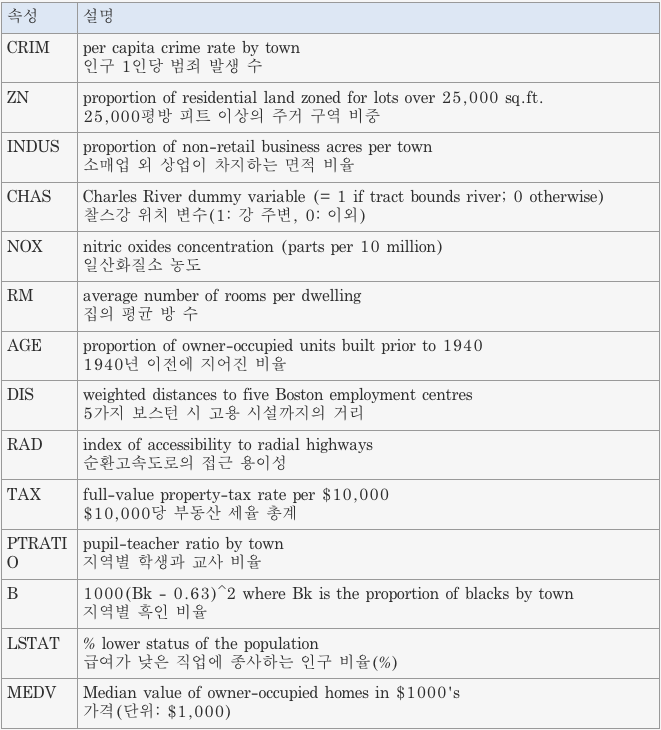

**MEDV를 Target으로, 나머지 변수들을 feature로 설정**

In [8]:
target = Df_dt[['MEDV']]

In [9]:
target

,MEDV
0,24.000
1,21.600
2,34.700
3,33.400
4,36.200
...,...
501,22.400
502,20.600
503,23.900
504,22.000


In [10]:
features = Df_dt[['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


In [11]:
# target = ohe.fit_transform(target[[col]])
# features = ohe.fit_transform(features[[col]])

In [12]:
# 데이터 로드 확인
print(Df_dt.shape)            # 데이터의 가로세로수 확인
print(Df_dt.head())           # 데이터 앞부분(5개)확인
print(Df_dt.tail())           # 데이터 뒷부분(5개)확인

(506, 14)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700  
3 394.630  2.940 33.400  
4 396.900  5.330 36.200  
     CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
501 0.063 0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045 0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061 0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110 0.000 11.930 0.000 0.573 6.79

In [13]:
# 데이터의 결측치 확인
Df_dt.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
Df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
Df_dt.astype('int')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,18,2,0,0,6,65,4,1,296,15,396,4,24
1,0,0,7,0,0,6,78,4,2,242,17,396,9,21
2,0,0,7,0,0,7,61,4,2,242,17,392,4,34
3,0,0,2,0,0,6,45,6,3,222,18,394,2,33
4,0,0,2,0,0,7,54,6,3,222,18,396,5,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,11,0,0,6,69,2,1,273,21,391,9,22
502,0,0,11,0,0,6,76,2,1,273,21,396,9,20
503,0,0,11,0,0,6,91,2,1,273,21,396,5,23
504,0,0,11,0,0,6,89,2,1,273,21,393,6,22


In [16]:
# Df_dt = Df_dt.astype(dtype='int64')

In [17]:
Df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 데이터의 표준화
분석하는 feature들의 단위가 서로 다를 수 있으므로 단위를 표준화할 필요가 있는데 이를 표준화라고 함. 한편 표준화 방법에는 여러가지 있음. 여기서는 `StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춥니다.`를 사용함

In [18]:
#from sklearn.preprocessing import MinMafeaturescaler
from sklearn.preprocessing import StandardScaler
#scaler_minmax=MinMafeaturescaler()
scaler_standard=StandardScaler()

In [19]:
scaler_standard.fit(features)
features_scaled=scaler_standard.transform(features)
print(features_scaled.shape)
print(features[:6])
features_scaled[:6]

(506, 13)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   
5 0.030  0.000  2.180 0.000 0.458 6.430 58.700 6.062 3.000 222.000   18.700   

        B  LSTAT  
0 396.900  4.980  
1 396.900  9.140  
2 392.830  4.030  
3 394.630  2.940  
4 396.900  5.330  
5 394.120  5.210  


array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148],
       [-0.41704368, -0.487722

## 훈련/테스트 셋 분류

### 회귀분석용

In [20]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, random_state=42)#, test_size=0.2, stratify=y
# 중요한 것은 42를 사용할 때마다 처음 분할 할 때 항상 동일한 출력을 얻는다
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# test_size와 stratify는 필요한 옵션이지만 데이터가 적은 경우 에러가 발생될 수 있음

X_scaled과 y에 대해 train_test_split을 실행하면 총 4개의 데이터셋(X_scaled_train, X_scaled_test, y_train, y_test) 생성됨

In [21]:
print(features_scaled_train[:6])
print(target_train[:6])

[[-0.40992396 -0.48772236 -1.2660231  -0.27259857 -0.57613394  1.23997392
   0.84012202 -0.52026428 -0.75292215 -1.27835435 -0.30309415  0.41057102
  -1.09799011]
 [-0.00913688 -0.48772236  1.2319449   3.66839786  2.73234648 -0.18895873
   0.49874053 -0.97428934 -0.52300145 -0.03110494 -1.73641788 -2.94572872
   0.33178248]
 [-0.41635358  0.370669   -1.13908197 -0.27259857 -0.96572262  2.18737194
  -0.14490582  0.42766932 -0.52300145 -1.14175084 -1.64394538  0.33590374
  -1.24657432]
 [-0.37544025 -0.48772236  2.11761463 -0.27259857  0.22723076 -0.95684976
   0.96102797 -0.96872752 -0.8678825  -1.30805076  0.29797709  0.02868241
   2.04750959]
 [-0.41269248 -0.48772236 -1.15221381 -0.27259857 -0.81800718  0.06890449
  -1.82692087  0.67481374 -0.6379618   0.1292557  -0.71922039  0.203235
  -0.74475218]
 [-0.26286427 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.30293142
   1.11749449  0.18061998 -0.6379618  -0.6012761   1.17646583  0.21990082
   0.05423839]]
      MEDV
182 37.900
1

In [22]:
print(features_scaled_test[:6])
print(target_test[:6])

[[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
   0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914  0.42570183
  -0.50645674]
 [-0.41394931  1.22906036 -0.68968118  3.66839786 -0.93030547  0.67438443
  -1.26861989  0.13431903 -0.6379618  -0.91605809 -0.39556665  0.44105193
  -1.27881429]
 [-0.40821211 -0.48772236  2.42256516 -0.27259857  0.469104   -0.42972605
   1.0748218  -0.91600909 -0.6379618   1.79819419  0.76033959  0.36660394
   0.75931252]
 [-0.40985297 -0.48772236 -0.04768006 -0.27259857 -1.22400869 -0.31290404
  -2.16119024  0.70937307 -0.6379618  -0.61315466  0.34421334  0.37537543
  -0.99986846]
 [ 0.17184212 -0.48772236  1.01599907 -0.27259857  1.36749033  0.01761678
   0.8258978  -0.67827698  1.66124525  1.53092646  0.80657583  0.31156286
   0.64717349]
 [-0.40870204 -0.48772236  0.24705682 -0.27259857 -1.01668877 -0.00802708
   0.2106999   0.12224465 -0.52300145 -0.06080135  0.1130321   0.18624024
  -0.09574756]]
      MEDV
173 23.600

In [23]:
print(features_scaled_train.shape)
print(target_train.shape)

(379, 13)
(379, 1)


In [24]:
print(features_scaled_test.shape)
print(target_test.shape)

(127, 13)
(127, 1)


https://sonny-daily-story.tistory.com/61

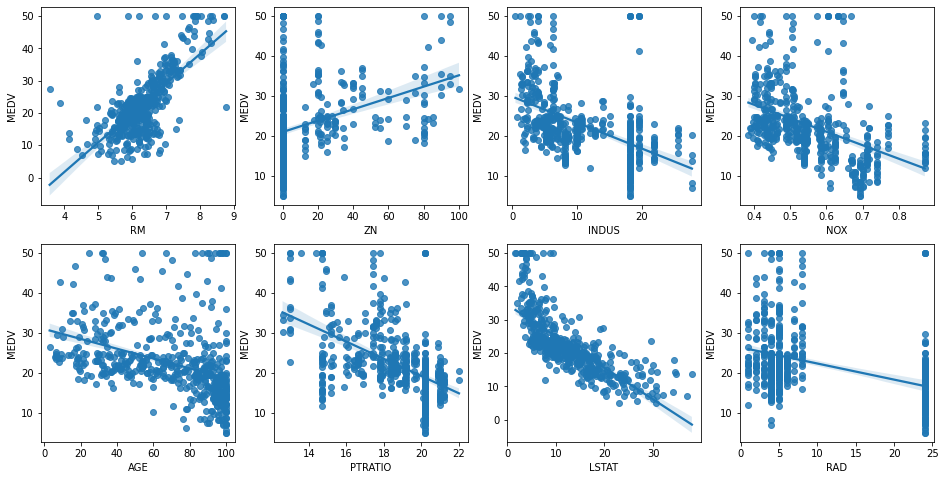

In [29]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y=target, data=Df_dt , ax=axs[row][col])

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = Df_dt[['MEDV']]
X_data = Df_dt.drop(['MEDV'], axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [44]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [40.99559517]
회귀 계수값: [[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
   -0.6]]


In [48]:
# # 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
# coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# coeff.sort_values(ascending=False)

In [49]:
from sklearn.model_selection import cross_val_score

y_target = Df_dt[['MEDV']]
X_data = Df_dt.drop(['MEDV'], axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
